In [1]:
import pickle
import itertools
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=16)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rc('legend', title_fontsize=16)
plt.rc('legend', framealpha=0.0)
plt.rc('figure', titlesize=16)

cs = ['royalblue', 'olivedrab', 'purple', 'darkorange', 'deepskyblue']

In [2]:
### Dependent variables
num_train_examples_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
random_labels_list = [True, False]
binary_digits_list = [True, False]
depth_list = [2, 7]
width_list = [5000, 10000]
seed_list = [0, 1, 2]

param_product = itertools.product( num_train_examples_list, random_labels_list, binary_digits_list, depth_list, width_list, seed_list )

results = {}

for params in param_product:
    fname = 'logs/pac-bayes/' + str(params) + '.pickle'
    results[params] = pickle.load( open( fname, "rb" ) )

In [3]:
def get_curves(random_labels, binary_digits, depth, width, idx):
    
    array = np.zeros((3,10))

    for seed in seed_list:
        for num_idx, num_train_examples in enumerate(num_train_examples_list):
            result = results[(num_train_examples, random_labels, binary_digits, depth, width, seed)][idx]
            if idx == 0:
                array[seed,num_idx] = 1-result[-1]
            elif idx == 1:
                array[seed,num_idx] = 1-result
            else:
                array[seed,num_idx] = result
    
    return array.mean(axis=0), array.max(axis=0), array.min(axis=0)

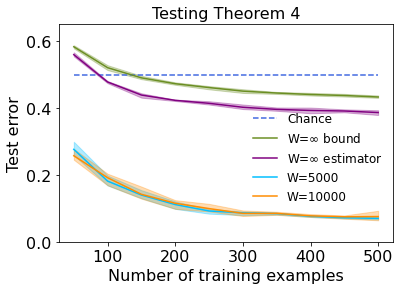

In [4]:
plt.plot(num_train_examples_list, [0.5]*len(num_train_examples_list), label="Chance", linestyle='--', color=cs[0])

random_labels = False
binary_digits = False
depth = 7
width = 5000

label = "W=$\infty$ bound"
color = cs[1]
idx = 5
mean, maxi, mini = get_curves(random_labels, binary_digits, depth, width, idx)
plt.plot(num_train_examples_list, mean, label=label, color=color)
plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

label = "W=$\infty$ estimator"
color = cs[2]
idx = 2
mean, maxi, mini = get_curves(random_labels, binary_digits, depth, width, idx)
plt.plot(num_train_examples_list, mean, label=label, color=color)
plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

label = f"W={width}"
color = cs[4]
idx = 1
mean, maxi, mini = get_curves(random_labels, binary_digits, depth, width, idx)
plt.plot(num_train_examples_list, mean, label=label, color=color)
plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

width = 10000
label = f"W={width}"
color = cs[3]
idx = 1
mean, maxi, mini = get_curves(random_labels, binary_digits, depth, width, idx)
plt.plot(num_train_examples_list, mean, label=label, color=color)
plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

plt.xlabel("Number of training examples")
plt.ylabel("Test error")
plt.ylim(0.0,0.65)
plt.title("Testing Theorem 4")
plt.legend(loc='lower right', bbox_to_anchor=(1.0,0.13), fontsize=12)
plt.savefig('figures/bounds.pdf', bbox_inches='tight')
plt.show()

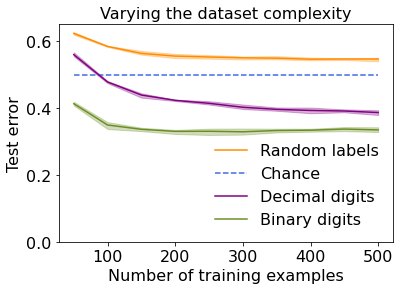

In [5]:
depth = 7
width = 5000

label = "Random labels"
random_labels = True
binary_digits = False
color = cs[3]
idx = 2
mean, maxi, mini = get_curves(random_labels, binary_digits, depth, width, idx)
plt.plot(num_train_examples_list, mean, label=label, color=color)
plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

label = "Chance"
plt.plot(num_train_examples_list, [0.5]*len(num_train_examples_list), label=label, linestyle='--', color=cs[0])

label = "Decimal digits"
random_labels = False
binary_digits = False
color = cs[2]
idx = 2
mean, maxi, mini = get_curves(random_labels, binary_digits, depth, width, idx)
plt.plot(num_train_examples_list, mean, label=label, color=color)
plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

label = "Binary digits"
random_labels = False
binary_digits = True
color = cs[1]
idx = 2
mean, maxi, mini = get_curves(random_labels, binary_digits, depth, width, idx)
plt.plot(num_train_examples_list, mean, label=label, color=color)
plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)


plt.xlabel("Number of training examples")
plt.ylabel("Test error")
plt.ylim(0.0,0.65)
plt.title("Varying the dataset complexity")
plt.legend(loc='lower right')
plt.savefig('figures/dataset-complexity.pdf', bbox_inches='tight')
plt.show()

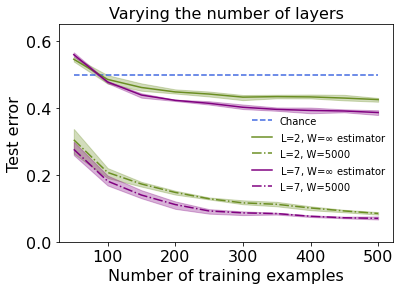

In [6]:
width = 5000
random_labels = False
binary_digits = False

label = "Chance"
plt.plot(num_train_examples_list, [0.5]*len(num_train_examples_list), label=label, linestyle='--', color=cs[0])

for d_idx, depth in enumerate(depth_list):
    label = f"L={depth}, W=$\infty$ estimator"
    color = cs[d_idx+1]
    idx = 2
    mean, maxi, mini = get_curves(random_labels, binary_digits, depth, width, idx)
    plt.plot(num_train_examples_list, mean, label=label, color=color)
    plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

    label = f"L={depth}, W={width}"
    color = cs[d_idx+1]
    idx = 1
    mean, maxi, mini = get_curves(random_labels, binary_digits, depth, width, idx)
    plt.plot(num_train_examples_list, mean, label=label, color=color, linestyle='-.')
    plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

plt.xlabel("Number of training examples")
plt.ylabel("Test error")
plt.ylim(0.0,0.65)
plt.title("Varying the number of layers")
plt.legend(bbox_to_anchor=(0.55, 0.62), loc='upper left', fontsize=10)
plt.savefig('figures/varying-depth.pdf', bbox_inches='tight')
plt.show()